In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
from pydataset import data
import mason_functions as mf

## Mage Duel!

Let's use what we've learned to play a mage duel!

Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

## Exercises

Simulate mage duels to answer who is the more powerful mage?

## Exercise 1

Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down.

### I believe 4d6 mage guy will win because he got bigger dice

## Exercise 2 
Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?

In [2]:
#pwrful_mage defines a single paramater, an integer, and returns print statements with relevant data
#input the number of duels and output duel value counts
def pwrful_mage(n_duels):

    #no seed
    #np.random.seed(38)
    
    #damage output generator for roll 4 mage
    mage_4d6_dmg = np.random.choice(list(range(1, 7)), size = (n_duels, 4))
    
    #damage output generator for roll 6 mage
    mage_6d4_dmg = np.random.choice(list(range(1, 5)), size = (n_duels, 6))
    
    #health points generator for roll 4 mage
    mage_4d6_health = np.random.choice(list(range(1, 7)), size = (n_duels, 4))
    
    #health points generator for roll 6 mage
    mage_6d4_health = np.random.choice(list(range(1, 5)), size = (n_duels, 6))
    
    #assign a variable name to a dataframe for R4 damage die values
    R4_dmg = pd.DataFrame(mage_4d6_dmg)
    
    #assign a variable name to a dataframe for R6 damage die values
    R6_dmg = pd.DataFrame(mage_6d4_dmg)
    
    #assign a variable name to a dataframe for R4 health die values
    R4_hrts = pd.DataFrame(mage_4d6_health)
    
    #assign a variable name to a dataframe for R6 health die values
    R6_hrts = pd.DataFrame(mage_6d4_health)
    
    #sum up the values of rolling 4 six-sided dice to get damage output
    R4_dmg['damage'] = R4_dmg[:].sum(axis = 1)
    
    #do it again for the health points to get total health
    R4_hrts['health_points'] = R4_hrts[:].sum(axis = 1)
    
    #sum up the values of rolling 6 four-sided dice to get damage output
    R6_dmg['damage'] = R6_dmg[:].sum(axis = 1)
    
    #total health for R6 mage
    R6_hrts['health_points'] = R6_hrts[:].sum(axis = 1)
    
    #assign a variable name for a dataframe with the duel data
    duels = pd.DataFrame(data = {
        'R4_hrts': R4_hrts.health_points,
        'R6_dmg': R6_dmg.damage,
        'R6_hrts': R6_hrts.health_points,
        'R4_dmg': R4_dmg.damage,
        'R4_remaining': R4_hrts.health_points,
        'R6_remaining': R6_hrts.health_points
    })
    
    #set counters for mage duel results
    R4_wins = 0
    R6_wins = 0
    draws = 0
    
    #start a for loop to run through each row of the duels dataframe (simulate each duel)
    for n in range(len(duels)):
        
        #start a while loop to simulate attacks while both mages still live (until someone croaks)
        while duels.R4_remaining[n] > 0 and duels.R6_remaining[n] > 0:
            
            #deduct health points by damage points (simulate attacks)
            duels.R4_remaining[n] = duels.R4_remaining[n] - duels.R6_dmg[n]
            duels.R6_remaining[n] = duels.R6_remaining[n] - duels.R4_dmg[n]
            
        #if R4 survives, add a victory to R4's tally        
        if duels.R4_remaining[n] > duels.R6_remaining[n] and duels.R4_remaining[n] > 0:
            R4_wins += 1
            
        #if R6 survives, add a victory to R6's tally
        elif duels.R6_remaining[n] > duels.R4_remaining[n] and duels.R6_remaining[n] > 0:
            R6_wins += 1
     
        #if R4 and R6 slay each other simultaneously, add a tally to the draws
        else:
            draws += 1
            
    duels['R4_wins'] = (duels.R4_remaining > duels.R6_remaining) & (duels.R4_remaining > 0)
    duels['R6_wins'] = (duels.R6_remaining > duels.R4_remaining) & (duels.R6_remaining > 0)
    duels['Draw'] = (duels.R4_remaining <= 0) & (duels.R6_remaining <= 0)
    
    #if R4 wins more duels, declare the winner
    if R4_wins > R6_wins:
        print(f'R4-6SD wins with {R4_wins} victories!')
        print(f'R6-4SD perishes with {R6_wins}.')
        if draws == 1:
            print(f'There was one glorious instance of simultaenous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {draws} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')
            
    #if R6 wins more duels, declare the winner    
    elif R6_wins > R4_wins:
        print(f'R6-4SD wins with {R6_wins} victories!')
        print(f'R4-6SD perishes with {R4_wins}.')
        if draws == 1:
            print(f'There was one glorious instance of simultaenous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {draws} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')
            
    #if the amount of duel wins is equal, declare a draw        
    else:
        print('Draw.')
        print(f'There were {draws} glorious instances of simultaneous destruction!')
        print(f'R4-6SD had {R4_wins} wins.')
        print(f'R6-4SD had {R6_wins} wins.')
        print(f'--------------------------')
        
    #some data
    if n_duels > 10:
        print(f'There is a {round((R4_wins / n_duels) * 100, 1)}% chance that R4_6SD mage will win any duel.')
        print(f'There is a {round((R6_wins / n_duels) * 100, 1)}% chance that R6_4SD mage will win any duel.')
        print(f'There is a {round((draws / n_duels) * 100, 1)}% chance that there will be a draw in any round.')
        print(f'-------------------------------------------------')
        print('Sample')
        print('------')
        print(duels.sample(10))
    if n_duels <= 10:
        print(duels)
        
    if n_duels >= 1000:
        x = np.arange(0, n_duels * 4 / 5)
    else:
        x = np.arange(0, n_duels)
    p0 = duels.R4_wins.mean()
    p1 = duels.R6_wins.mean()
    p2 = duels.Draw.mean()
    y0 = stats.binom(n_duels, p0).pmf(x)
    y1 = stats.binom(n_duels, p1).pmf(x)
    y2 = stats.binom(n_duels, p2).pmf(x)
    plt.figure(figsize = (7, 4))
    plt.bar(x, y0, color = 'maroon')
    plt.title(f'Winning Probiblity for R4 | {n_duels} Duels', size = 19)
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Winning Probability for R6 | {n_duels} Duels', size = 19)
    plt.bar(x, y1, color = 'orange')
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Probability of a Draw | {n_duels} Duels', size = 19)
    plt.bar(x, y2, color = 'silver')
    plt.xlabel('Draws', size = 16)
    plt.ylabel('Probability', size = 16);
    print('-----------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf(0), 2) * 100}% chance that R4_6SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf(0), 2) * 100}% chance that R6_4SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf(0), 2) * 100}% chance that there will be at least one draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 3) - 1), 3) * 100}% chance that R4_6SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 3) - 1), 3) * 100}% chance that R6_4SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 3) - 1), 3) * 100}% chance that at least a third of the rounds will be a draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 2) - 1), 3) * 100}% chance that R4_6SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 2) - 1), 3) * 100}% chance that R6_4SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 2) - 1), 3) * 100}% chance that at least half of the rounds will be a draw.')

R6-4SD wins with 4 victories!
R4-6SD perishes with 0.
There were 6 glorious instances of simultaneous destruction.
------------------------------------------------------------
   R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
0       14      18       17      18            -4            -1    False   
1       15      12       16      14            -9           -12    False   
2       14      14       17      15             0             2    False   
3       10      12       17      14            -2             3    False   
4       17      12       17      14            -7           -11    False   
5       22      17       18      16           -12           -14    False   
6       14      16       10      16            -2            -6    False   
7       14      14       16      15             0             1    False   
8       12      15       16      15            -3             1    False   
9       17      16       21      14           -15            -7 

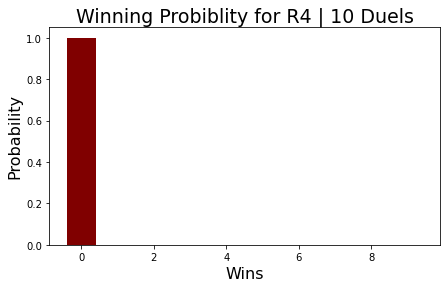

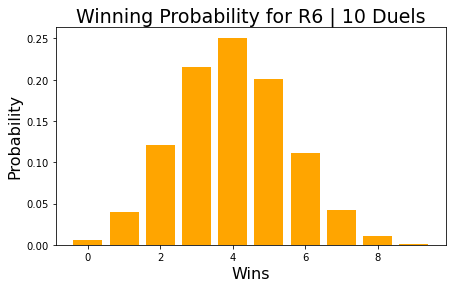

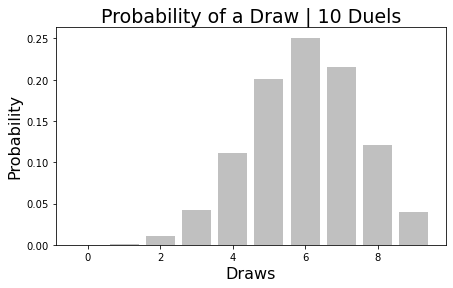

In [3]:
pwrful_mage(10)

R6-4SD wins with 5 victories!
R4-6SD perishes with 1.
There were 4 glorious instances of simultaneous destruction.
------------------------------------------------------------
   R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
0        9      17       18      17            -8             1    False   
1       13      13       16      12             0             4    False   
2       19      12       15      10            -5            -5    False   
3       11      17       13       9            -6             4    False   
4       14      14       18      15             0             3    False   
5       18      15       12      16             3            -4     True   
6       13      19       17      10            -6             7    False   
7       18      14       19      15           -10           -11    False   
8       16      10       15      10            -4            -5    False   
9       16      21       12      12            -5             0 

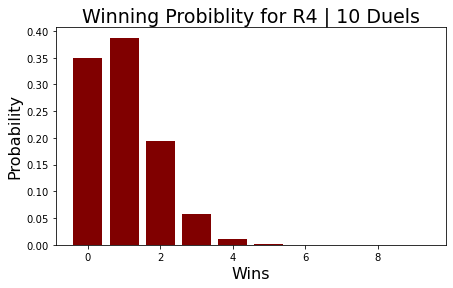

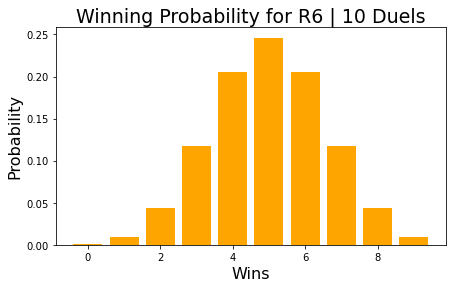

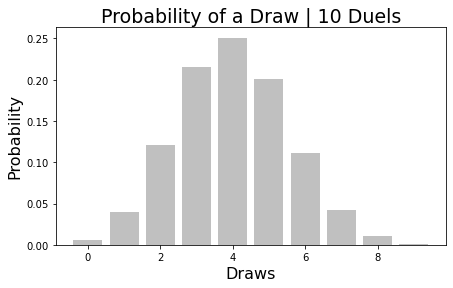

In [4]:
pwrful_mage(10)

## Exercise 3
Do the results change much at 100 duels?

R6-4SD wins with 26 victories!
R4-6SD perishes with 20.
There were 54 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 20.0% chance that R4_6SD mage will win any duel.
There is a 26.0% chance that R6_4SD mage will win any duel.
There is a 54.0% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
    R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
96       15      12       14      11            -9            -8    False   
38       15      17       13      15            -2            -2    False   
95       17      16       15      16             1            -1     True   
40       11      18       13      22            -7            -9    False   
56       18      14       17      11           -10            -5    False   
58       17      13       13      13             4             0     True   
2        16      16       22      

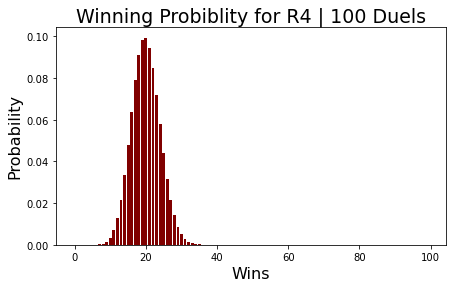

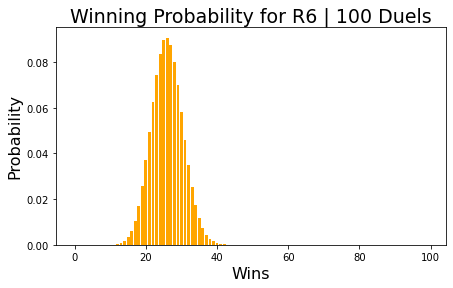

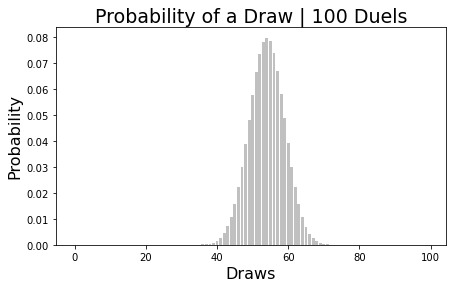

In [5]:
pwrful_mage(100)

## Exercise 4
Now, simulate 10,000 mage duels. Is there a clear winner?

R6-4SD wins with 3645 victories!
R4-6SD perishes with 1717.
There were 4638 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 17.2% chance that R4_6SD mage will win any duel.
There is a 36.4% chance that R6_4SD mage will win any duel.
There is a 46.4% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
      R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
7411       10      12       13      13            -2             0    False   
1057       19      15       18      11           -11            -4    False   
9856       15      13       13      10           -11            -7    False   
54         16      18       13      14            -2            -1    False   
6902       12      14       19      19            -2             0    False   
7499       19      15       21      15           -11            -9    False   
8655       20 

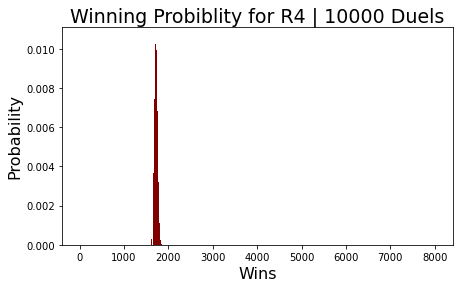

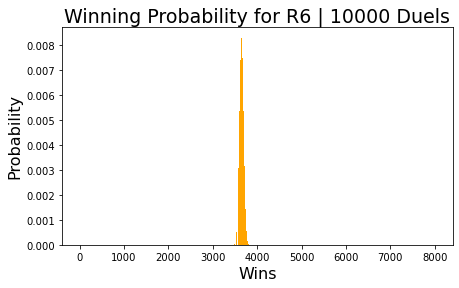

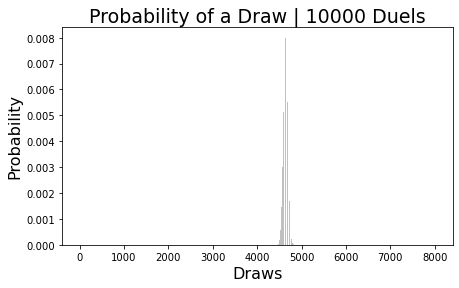

In [6]:
pwrful_mage(10_000)

# A Simpleton Duel

In [7]:
#a simple duel
def ur_a_wizard_arry(n_duels):
        
    #health and damage output generator for roll 4 mage
    mage_4d6_health_and_dmg = np.random.choice(list(range(1, 7)), size = (n_duels, 4))
        
    #health and damage output generator for roll 6 mage
    mage_6d4_health_and_dmg = np.random.choice(list(range(1, 5)), size = (n_duels, 6))
        
    #dataframes for simulation of health and damage generation
    R4_stats = pd.DataFrame(mage_4d6_health_and_dmg)
    R6_stats = pd.DataFrame(mage_6d4_health_and_dmg)
        
    #code columns to represent the value for 'power' (health value = damage value)
    R4_stats['power'] = R4_stats[:].sum(axis = 1)
    R6_stats['power'] = R6_stats[:].sum(axis = 1)
        
    #create dataframe to represent R4 and R6 power levels. encode columns to represent individual wins and draws
    duel_data = pd.DataFrame({
        'R4_power': R4_stats.power,
        'R6_power': R6_stats.power
    })
    
    duel_data['R4_wins'] = duel_data.R4_power > duel_data.R6_power
    duel_data['R6_wins'] = duel_data.R6_power > duel_data.R4_power
    duel_data['Draw'] = duel_data.R4_power == duel_data.R6_power
        
        #if R4 wins, declare winner
    if duel_data.R4_wins.sum() > duel_data.R6_wins.sum():
        print(f'R4-D6 wins with {duel_data.R4_wins.sum()} victories!')
        print(f'R6-D4 perishes with {duel_data.R6_wins.sum()}.')
        if duel_data.Draw.sum() == 1:
            print(f'There was one glorious instance of simultaneous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {duel_data.Draw.sum()} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')
                
    #if R6 wins, declare winner        
    elif duel_data.R6_wins.sum() > duel_data.R4_wins.sum():
        print(f'R6-D4 wins with {duel_data.R6_wins.sum()} victories!')
        print(f'R4-D6 perishes with {duel_data.R4_wins.sum()}.')
            
        #grammar Nazis beware
        if duel_data.Draw.sum() == 1:
            print(f'There was one glorious instance of simultaenous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {duel_data.Draw.sum()} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')
                
    #if no one wins, declare a draw        
    else:
        print('Draw')
        print(f'There were {duel_data.Draw.sum()} glorious instances of simultaneous destruction!')
        print(f'R4-D6 had {duel_data.R4_wins.sum()} wins.')
        print(f'R6-D4 had {duel_data.R6_wins.sum()} wins.')
        print('------------------')
        
    #some data    
    if n_duels > 10:
        print(f'There is a {round(duel_data.R4_wins.mean() * 100, 1)}% chance that R4_6D mage will win any duel.')
        print(f'There is a {round(duel_data.R6_wins.mean() * 100, 1)}% chance that R6_4D mage will win any duel.')
        print(f'There is a {round(duel_data.Draw.mean() * 100, 1)}% chance that there will be a draw in any round.')
        print(f'-------------------------------------------------')
    if n_duels <= 10:
        print(duel_data)
    else:
        print('Sample')
        print('------')
        print(duel_data.sample(10))
        
    if n_duels >= 1000:
        x = np.arange(0, n_duels * 7 / 10)
    else:
        x = np.arange(0, n_duels)
    p0 = duel_data.R4_wins.mean()
    p1 = duel_data.R6_wins.mean()
    p2 = duel_data.Draw.mean()
    y0 = stats.binom(n_duels, p0).pmf(x)
    y1 = stats.binom(n_duels, p1).pmf(x)
    y2 = stats.binom(n_duels, p2).pmf(x)
    plt.figure(figsize = (7, 4))
    plt.bar(x, y0, color = 'maroon')
    plt.title(f'Winning Probiblity for R4 | {n_duels} Duels', size = 19)
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Winning Probability for R6 | {n_duels} Duels', size = 19)
    plt.bar(x, y1, color = 'orange')
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Probability of a Draw | {n_duels} Duels', size = 19)
    plt.bar(x, y2, color = 'silver')
    plt.xlabel('Draws', size = 16)
    plt.ylabel('Probability', size = 16);
    print('-----------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf(0), 2) * 100}% chance that R4_6SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf(0), 2) * 100}% chance that R6_4SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf(0), 2) * 100}% chance that there will be at least one draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 3) - 1), 3) * 100}% chance that R4_6SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 3) - 1), 3) * 100}% chance that R6_4SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 3) - 1), 3) * 100}% chance that at least a third of the rounds will be a draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 2) - 1), 3) * 100}% chance that R4_6SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 2) - 1), 3) * 100}% chance that R6_4SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 2) - 1), 3) * 100}% chance that at least half of the rounds will be a draw.')

Simulate 10 duels

R4-D6 wins with 6 victories!
R6-D4 perishes with 4.
There were 0 glorious instances of simultaneous destruction.
------------------------------------------------------------
   R4_power  R6_power  R4_wins  R6_wins   Draw
0         8        10    False     True  False
1        20        14     True    False  False
2        15        14     True    False  False
3        10        19    False     True  False
4        18        16     True    False  False
5        18        14     True    False  False
6        15        14     True    False  False
7        14        18    False     True  False
8        17        12     True    False  False
9        17        21    False     True  False
-----------------
There is a 100.0% chance that R4_6SD mage will win at least one duel.
There is a 99.0% chance that R6_4SD mage will win at least one duel.
There is a 0.0% chance that there will be at least one draw.
--------------------------------------------------------------
There is a 98.8% chance that

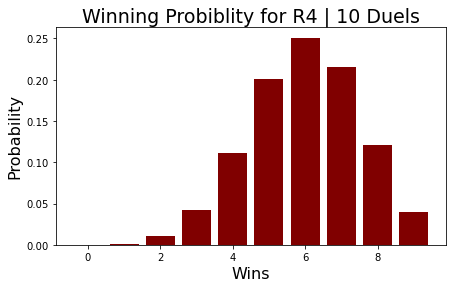

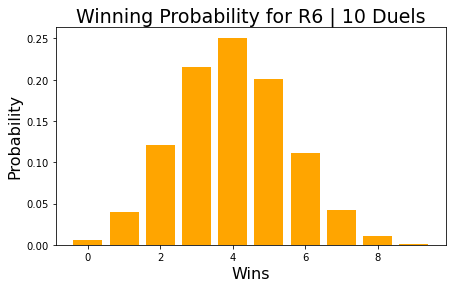

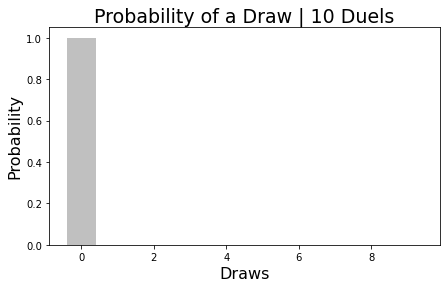

In [8]:
ur_a_wizard_arry(10)

10 duels again

R6-D4 wins with 6 victories!
R4-D6 perishes with 4.
There were 0 glorious instances of simultaneous destruction.
------------------------------------------------------------
   R4_power  R6_power  R4_wins  R6_wins   Draw
0        15        14     True    False  False
1        10        18    False     True  False
2        18        10     True    False  False
3        14        15    False     True  False
4         9        13    False     True  False
5         4        15    False     True  False
6        18        11     True    False  False
7        10        13    False     True  False
8        17        14     True    False  False
9         9        18    False     True  False
-----------------
There is a 99.0% chance that R4_6SD mage will win at least one duel.
There is a 100.0% chance that R6_4SD mage will win at least one duel.
There is a 0.0% chance that there will be at least one draw.
--------------------------------------------------------------
There is a 83.3% chance that

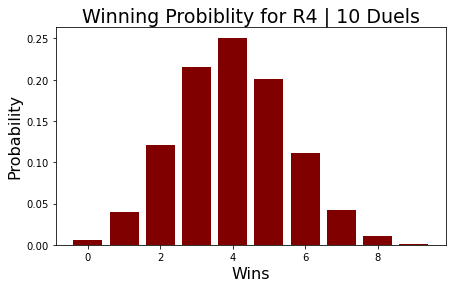

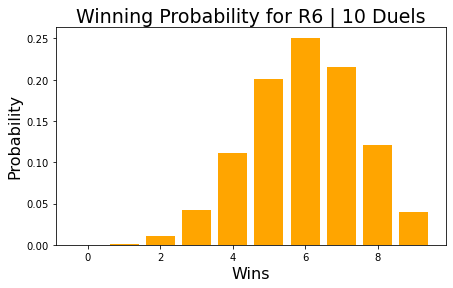

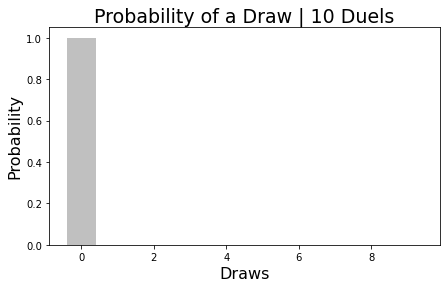

In [9]:
ur_a_wizard_arry(10)

100 duels

R6-D4 wins with 56 victories!
R4-D6 perishes with 34.
There were 10 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 34.0% chance that R4_6D mage will win any duel.
There is a 56.0% chance that R6_4D mage will win any duel.
There is a 10.0% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
    R4_power  R6_power  R4_wins  R6_wins   Draw
98        16        15     True    False  False
39        13        13    False    False   True
49        15        16    False     True  False
51        20        15     True    False  False
91        15        14     True    False  False
77        12        16    False     True  False
60         9        14    False     True  False
82        17        15     True    False  False
13        16        18    False     True  False
88        15        17    False     True  False
-----------------
There is a 100.0% chance that R

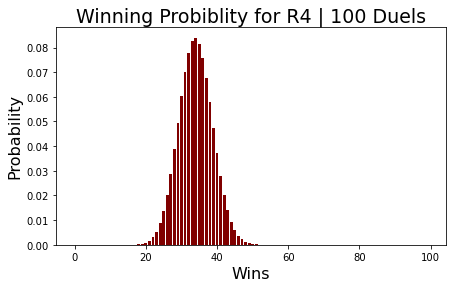

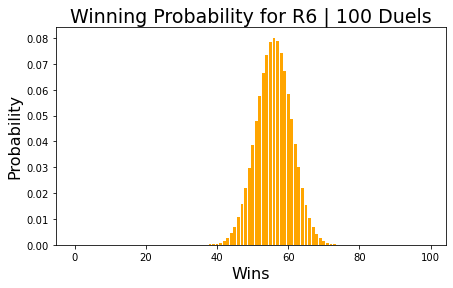

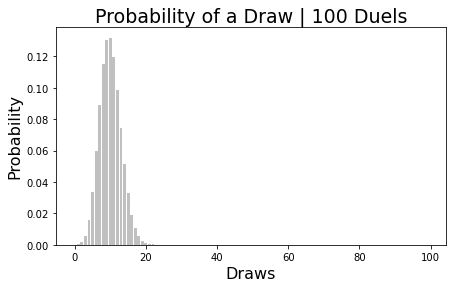

In [10]:
ur_a_wizard_arry(100)

10,000 duels

R6-D4 wins with 5431 victories!
R4-D6 perishes with 3683.
There were 886 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 36.8% chance that R4_6D mage will win any duel.
There is a 54.3% chance that R6_4D mage will win any duel.
There is a 8.9% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
      R4_power  R6_power  R4_wins  R6_wins   Draw
4874        15        17    False     True  False
2017        18        18    False    False   True
3503        18        17     True    False  False
1852        13        18    False     True  False
9946        13        15    False     True  False
8565        13        13    False    False   True
3067        13        13    False    False   True
2869        22        13     True    False  False
5806        15        11     True    False  False
6589        15        16    False     True  False
-----------------
There

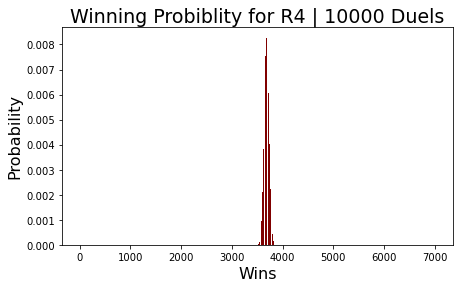

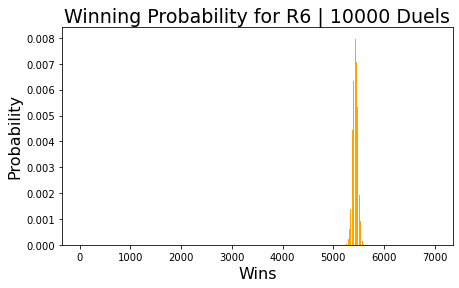

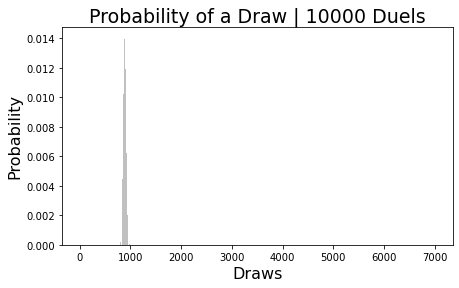

In [11]:
ur_a_wizard_arry(10_000)

One million duels

# A compromise scenario

In [12]:
#a better comparison
def powerful_wizard(n_duels):        
 
    #damage output generator for roll 4 mage
    mage_4d6_dmg = np.random.choice(list(range(1, 7)), size = (n_duels, 4))        
    
    #damage output generator for roll 6 mage
    mage_6d4_dmg = np.random.choice(list(range(1, 5)), size = (n_duels, 6))        
    
    #health points generator for roll 4 mage
    mage_4d6_health = np.random.choice(list(range(1, 7)), size = (n_duels, 4))        
    
    #health points generator for roll 6 mage
    mage_6d4_health = np.random.choice(list(range(1, 5)), size = (n_duels, 6))        
    
    #assign a variable name to a dataframe for R4 damage die values
    R4_dmg = pd.DataFrame(mage_4d6_dmg)        
    
    #assign a variable name to a dataframe for R6 damage die values
    R6_dmg = pd.DataFrame(mage_6d4_dmg)        
    
    #assign a variable name to a dataframe for R4 health die values
    R4_hrts = pd.DataFrame(mage_4d6_health)        
    
    #assign a variable name to a dataframe for R6 health die values
    R6_hrts = pd.DataFrame(mage_6d4_health)        
    
    #sum up the values of rolling 4 six-sided dice to get damage output
    R4_dmg['damage'] = R4_dmg[:].sum(axis = 1)        
    
    #do it again for the health points to get total health
    R4_hrts['health_points'] = R4_hrts[:].sum(axis = 1)        
    
    #sum up the values of rolling 6 four-sided dice to get damage output
    R6_dmg['damage'] = R6_dmg[:].sum(axis = 1)        
    
    #total health for R6 mage
    R6_hrts['health_points'] = R6_hrts[:].sum(axis = 1)        
    
    #assign a variable name for a dataframe with the duel data
    duels = pd.DataFrame(data = {
        'R4_hrts': R4_hrts.health_points,
        'R6_dmg': R6_dmg.damage,
        'R6_hrts': R6_hrts.health_points,
        'R4_dmg': R4_dmg.damage,
        'R4_remaining': R4_hrts.health_points,
        'R6_remaining': R6_hrts.health_points
    })                
    
    #start a for loop to run through each row of the duels dataframe (simulate each duel)
    for n in range(len(duels)):            
        
        #start a while loop to simulate attacks while both mages still live (until someone croaks)
        while duels.R4_remaining[n] > 0 and duels.R6_remaining[n] > 0:                
            
            #deduct health points by damage points (simulate attacks)
            duels.R4_remaining[n] = duels.R4_remaining[n] - duels.R6_dmg[n]          
            duels.R6_remaining[n] = duels.R6_remaining[n] - duels.R4_dmg[n]                
    
    
    
    #for the sake of the lesson here, we will just see who has a greater value of health by the time one or both
    #mages reach negative health
    duels['R4_wins'] = duels.R4_remaining > duels.R6_remaining            
    
    #create columns to represent individual wins    
    duels['R6_wins'] = duels.R6_remaining > duels.R4_remaining            
    
    #if R4 = R6, add a tally to the draws
    duels['Draw'] = duels.R4_remaining == duels.R6_remaining                                
    
    #if R4 wins more duels, declare the winner
    if duels.R4_wins.sum() > duels.R6_wins.sum():
        print(f'R4-6SD wins with {duels.R4_wins.sum()} victories!')
        print(f'R6-4SD perishes with {duels.R6_wins.sum()}.')
        if duels.Draw.sum() == 1:
            print(f'There was one glorious instance of simultaenous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {duels.Draw.sum()} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')
    
    #if R6 wins more duels, declare the winner    
    elif duels.R6_wins.sum() > duels.R4_wins.sum():
        print(f'R6-4SD wins with {duels.R6_wins.sum()} victories!')
        print(f'R4-6SD perishes with {duels.R4_wins.sum()}.')
        if duels.Draw.sum() == 1:
            print(f'There was one glorious instance of simultaenous destruction.')
            print(f'------------------------------------------------------------')
        else:
            print(f'There were {duels.Draw.sum()} glorious instances of simultaneous destruction.')
            print(f'------------------------------------------------------------')                
    
    #if the amount of duel wins is equal, declare a draw        
    else:
        print('Draw')
        print(f'There were {duels.Draw.sum()} glorious instances of simultaneous destruction.')
        print(f'R4-6SD had {duels.R4_wins.sum()} wins.')
        print(f'R6-4SD had {duels.R6_wins.sum()} wins.')
        print(f'--------------------------------------')
        
    #some data
    if n_duels > 10:
        print(f'There is a {round(duels.R4_wins.mean() * 100, 1)}% chance that R4_6SD mage will win any duel.')
        print(f'There is a {round(duels.R6_wins.mean() * 100, 1)}% chance that R6_4SD mage will win any duel.')
        print(f'There is a {round(duels.Draw.mean() * 100, 1)}% chance that there will be a draw in any round.')
        print(f'-------------------------------------------------')
    if n_duels <= 10:
        print(duels)
    else:
        print('Sample')
        print('------')
        print(duels.sample(10))

    if n_duels >= 1000:
        x = np.arange(0, n_duels * 7 / 10)
    else:
        x = np.arange(0, n_duels)
    p0 = duels.R4_wins.mean()
    p1 = duels.R6_wins.mean()
    p2 = duels.Draw.mean()
    y0 = stats.binom(n_duels, p0).pmf(x)
    y1 = stats.binom(n_duels, p1).pmf(x)
    y2 = stats.binom(n_duels, p2).pmf(x)
    plt.figure(figsize = (7, 4))
    plt.bar(x, y0, color = 'maroon')
    plt.title(f'Winning Probiblity for R4 | {n_duels} Duels', size = 19)
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Winning Probability for R6 | {n_duels} Duels', size = 19)
    plt.bar(x, y1, color = 'orange')
    plt.xlabel('Wins', size = 16)
    plt.ylabel('Probability', size = 16);
    plt.figure(figsize = (7, 4))
    plt.title(f'Probability of a Draw | {n_duels} Duels', size = 19)
    plt.bar(x, y2, color = 'silver')
    plt.xlabel('Draws', size = 16)
    plt.ylabel('Probability', size = 16);
    print('-----------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf(0), 2) * 100}% chance that R4_6SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf(0), 2) * 100}% chance that R6_4SD mage will win at least one duel.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf(0), 2) * 100}% chance that there will be at least one draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 3) - 1), 3) * 100}% chance that R4_6SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 3) - 1), 3) * 100}% chance that R6_4SD mage will win at least a third of all duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 3) - 1), 3) * 100}% chance that at least a third of the rounds will be a draw.')
    print('--------------------------------------------------------------')
    print(f'There is a {round(stats.binom(n_duels, p0).sf((n_duels / 2) - 1), 3) * 100}% chance that R4_6SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p1).sf((n_duels / 2) - 1), 3) * 100}% chance that R6_4SD mage will win at least half the duels.')
    print(f'There is a {round(stats.binom(n_duels, p2).sf((n_duels / 2) - 1), 3) * 100}% chance that at least half of the rounds will be a draw.')

R6-4SD wins with 5 victories!
R4-6SD perishes with 4.
There was one glorious instance of simultaenous destruction.
------------------------------------------------------------
   R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
0        7      21       16      13           -14             3    False   
1        6      12       12      18            -6            -6    False   
2       14      13       19      14           -12            -9    False   
3       17      17        8      13             0            -5     True   
4       16      17       12      14            -1            -2     True   
5       11       9       12      11            -7           -10     True   
6       17      12       16       9            -7            -2    False   
7       17      14       12      17             3            -5     True   
8       11      19       21      11            -8            10    False   
9       15      20       16      15            -5             1 

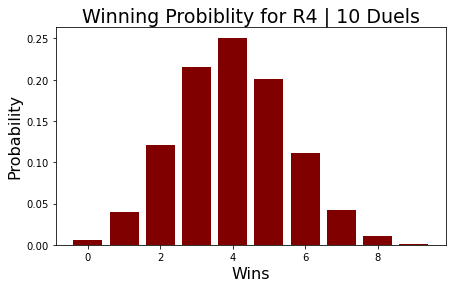

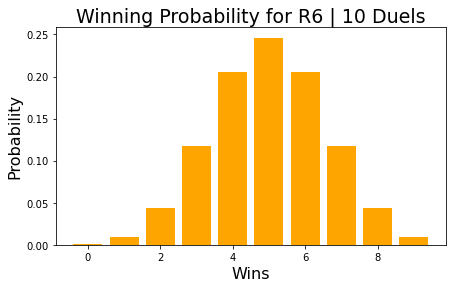

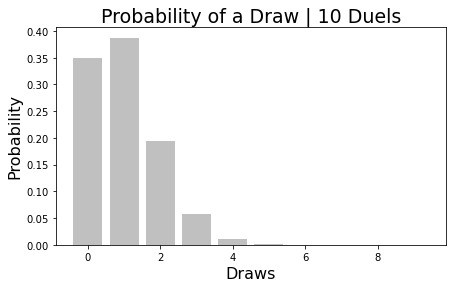

In [13]:
powerful_wizard(10)

R6-4SD wins with 6 victories!
R4-6SD perishes with 4.
There were 0 glorious instances of simultaneous destruction.
------------------------------------------------------------
   R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
0       20      18       19      20             2            -1     True   
1       17      11       14      10            -5            -6     True   
2       12      11       13       9           -10            -5    False   
3       13      14       15      13            -1             2    False   
4       10      16       12      11            -6             1    False   
5       19      18       16      15           -17           -14    False   
6       14      14       16      17             0            -1     True   
7       13      15       13      11            -2             2    False   
8       18      14       20       8           -10             4    False   
9       17      18       12      14            -1            -2 

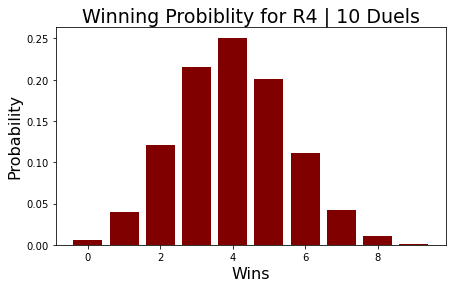

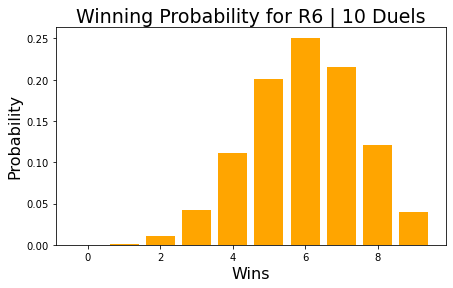

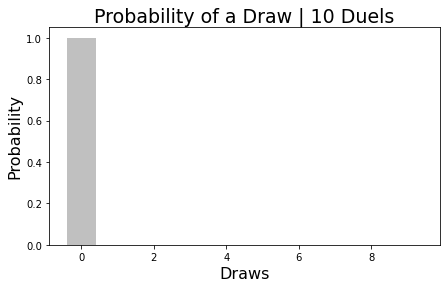

In [14]:
powerful_wizard(10)

R6-4SD wins with 56 victories!
R4-6SD perishes with 40.
There were 4 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 40.0% chance that R4_6SD mage will win any duel.
There is a 56.0% chance that R6_4SD mage will win any duel.
There is a 4.0% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
    R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
28        6      12       14      17            -6            -3    False   
62       12      16       17      20            -4            -3    False   
83       12      11       15      18             1            -3     True   
23       15      16       15      16            -1            -1    False   
90       20      16       18      17           -12           -16     True   
29       15      14       16      12           -13            -8    False   
6        15      15       16      14

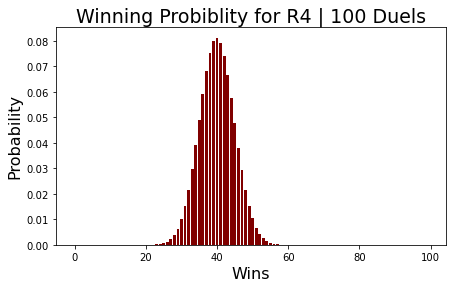

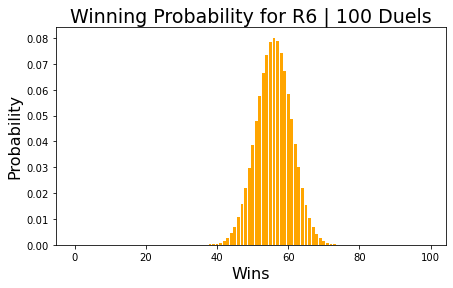

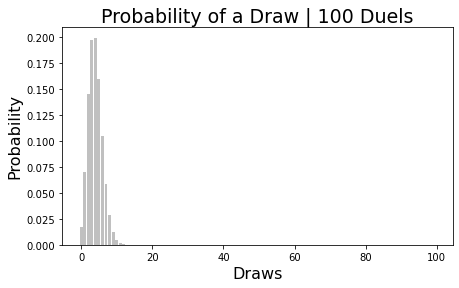

In [15]:
powerful_wizard(100)

R6-4SD wins with 601 victories!
R4-6SD perishes with 348.
There were 51 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 34.8% chance that R4_6SD mage will win any duel.
There is a 60.1% chance that R6_4SD mage will win any duel.
There is a 5.1% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
     R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
65        12      16       14      13            -4             1    False   
391       18      14       15      11           -10            -7    False   
595       20      17       13      15             3            -2     True   
908       15      12       16      11            -9            -6    False   
436       12      16       16      16            -4             0    False   
963       11      13       17      10            -2             7    False   
340       13      15      

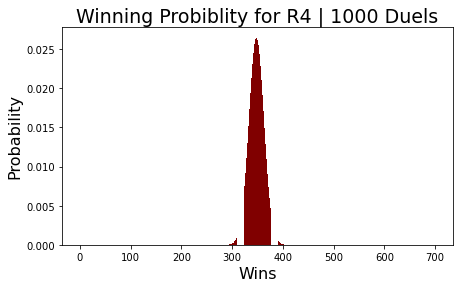

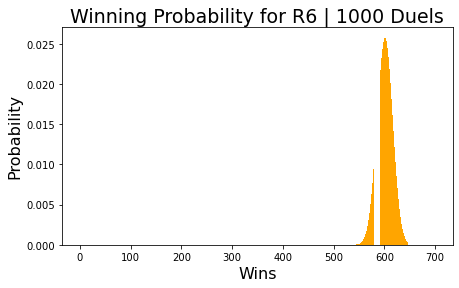

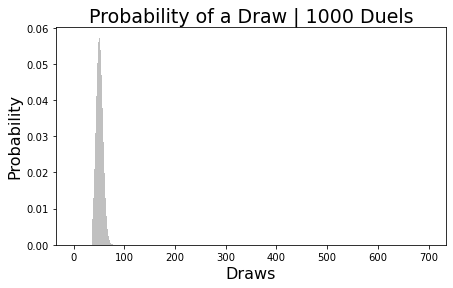

In [16]:
powerful_wizard(1000)

R6-4SD wins with 6127 victories!
R4-6SD perishes with 3418.
There were 455 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 34.2% chance that R4_6SD mage will win any duel.
There is a 61.3% chance that R6_4SD mage will win any duel.
There is a 4.6% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
      R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
5751        7      16       13      12            -9             1    False   
131         8      15       13      13            -7             0    False   
8670       13      11       10      11             2            -1     True   
1510       11      14       14      12            -3             2    False   
7641       15      18       16      16            -3             0    False   
4755       19      12       15       9            -5            -3    False   
8420        8   

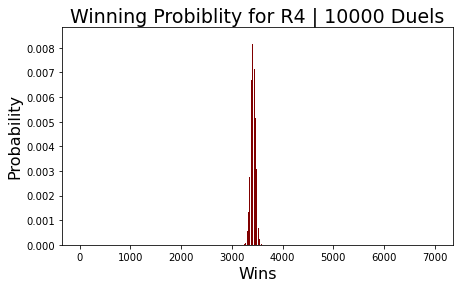

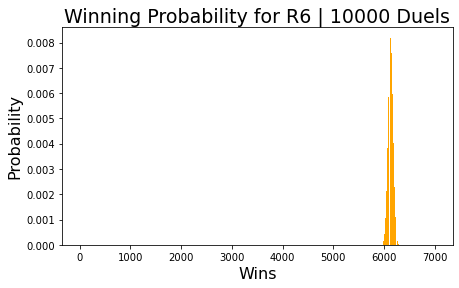

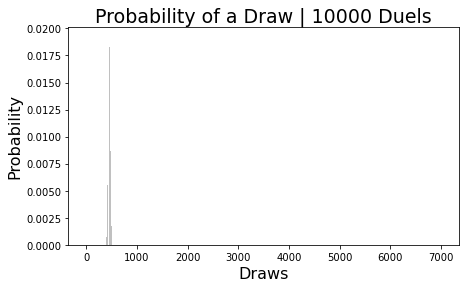

In [17]:
powerful_wizard(10_000)

Juxtaposition of Mage Duel Functions, 10,000 Duels

pwrful_mage function
--------------------
R6-4SD wins with 3555 victories!
R4-6SD perishes with 1642.
There were 4803 glorious instances of simultaneous destruction.
------------------------------------------------------------
There is a 16.4% chance that R4_6SD mage will win any duel.
There is a 35.5% chance that R6_4SD mage will win any duel.
There is a 48.0% chance that there will be a draw in any round.
-------------------------------------------------
Sample
------
      R4_hrts  R6_dmg  R6_hrts  R4_dmg  R4_remaining  R6_remaining  R4_wins  \
3329       17      18       18      16            -1             2    False   
3932       13      13       17      12             0             5    False   
6629        9      18       18      13            -9             5    False   
3336       21      13       17      20             8            -3     True   
7770       17      14       18      12           -11            -6    False   

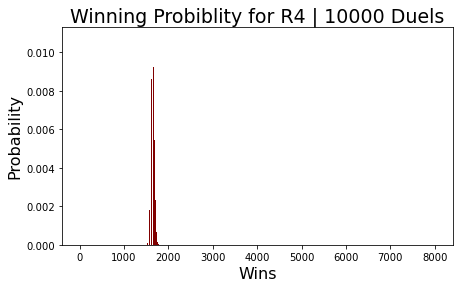

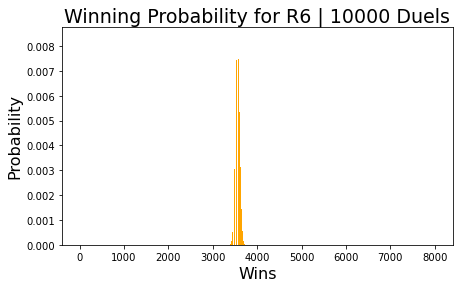

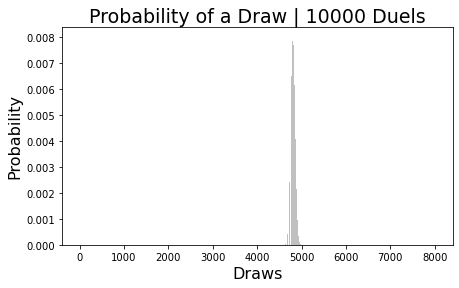

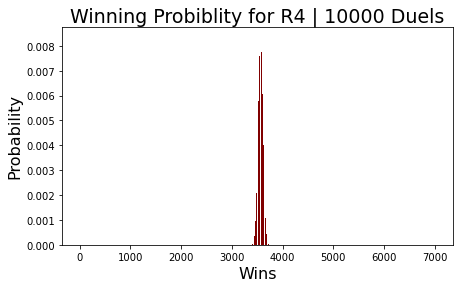

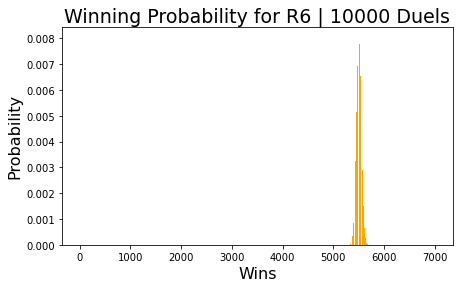

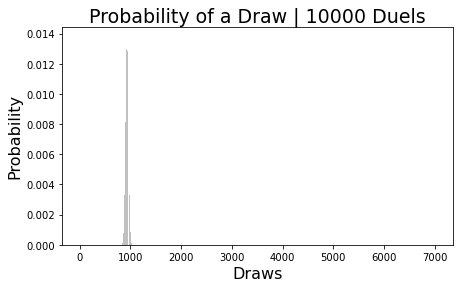

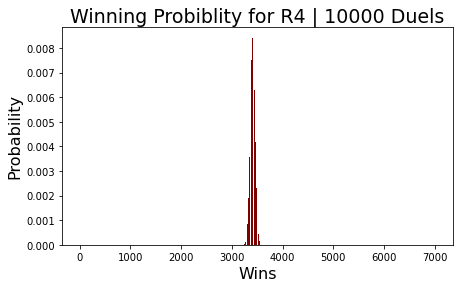

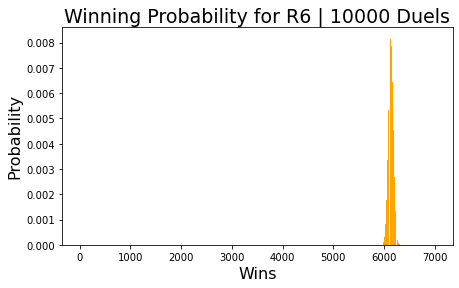

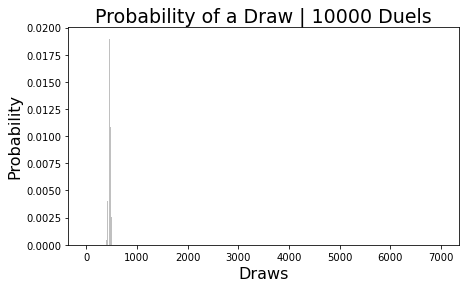

In [18]:
print('Juxtaposition of Mage Duel Functions, 10,000 Duels')
print('==================================================')
print('')
print('pwrful_mage function')
print('--------------------')
print(pwrful_mage(10_000))
print('==================================================')
print('')
print('ur_a_wizard_arry function')
print('-------------------------')
print(ur_a_wizard_arry(10_000))
print('==================================================')
print('')
print('powerful_wizard function')
print('------------------------')
print(powerful_wizard(10_000))

### mage 4d6 guy can't roll to save face